<a href="https://colab.research.google.com/github/juliosdutra/Controle_de_Processos_UFES/blob/main/1.Model-Simulation/Tanque_de_nivel_emPOO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exemplo feito com auxilio do Chat GPT

# Importando as bibliotecas

In [7]:
import numpy as  np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Definindo o modelo com a definição de uma classe.

* Classe `ReatorCSTR`:
Centraliza os parâmetros (A, Rv) e a lógica do modelo no método modelo.
* Encapsulamento:
O método simular abstrai o processo de integração e facilita a reutilização.
* Flexibilidade:
É possível criar instâncias com diferentes parâmetros de reator, simular com várias condições iniciais ou métodos numéricos.
* Organização:
O código fica mais modular e adaptado a futuras expansões, como implementar novos modelos ou diferentes entradas.

In [8]:

class TanqueNivel:
    def __init__(self, A=1.0, Rv=0.25):
        """
        Inicializa os parâmetros do tanque.
        """
        self.A = A  # Área da seção transversal
        self.Rv = Rv  # Resistência hidráulica

    def modelo(self, t, x, u):
        """
        Modelo do tanque de nível.

        Args:
            t: Tempo (não utilizado, mas exigido pelo solver)
            x: Lista de variáveis de estado (altura do nível)
            u: Lista de entradas do sistema (vazão de alimentação)

        Returns:
            dxdt: Derivadas das variáveis de estado
        """
        h = x[0]  # Altura do nível no tanque
        q0 = u[0]  # Vazão de entrada
        q = h / self.Rv  # Vazão de saída
        dhdt = (q0 - q) / self.A  # Taxa de variação do nível
        return [dhdt]

    def simular(self, x0, u0, tspan, metodo='BDF'):
        """
        Simula o modelo do tanque de nível.

        Args:
            x0: Condições iniciais das variáveis de estado
            u0: Entradas constantes do sistema
            tspan: Intervalo de tempo para integração [t_inicial, t_final]
            metodo: Método numérico para a integração (default: 'BDF')

        Returns:
            sol: Solução do integrador (tempo e estados)
        """
        modelo = lambda t, x: self.modelo(t, x, u0)
        sol = solve_ivp(modelo, tspan, x0, method=metodo)
        return sol

# Especificando as condições

In [9]:
# Configuração do modelo
q0 = 10.0  # Vazão de alimentação inicial
h0 = 2.5   # Altura inicial do nível no tanque
u0 = [q0 - 3.0]  # Vazão ajustada
x0 = [h0]        # Condição inicial do nível
tspan = [0, 5.0] # Intervalo de tempo de simulação

# Simulando o modelo

In [10]:
# Instanciando a classe e simulando
reator = TanqueNivel()
sol = reator.simular(x0, u0, tspan)

# Obtendo os resultados
t = sol.t  # Tempo
x = sol.y.flatten()  # Nível do tanque

# Gerando as saídas gráficas

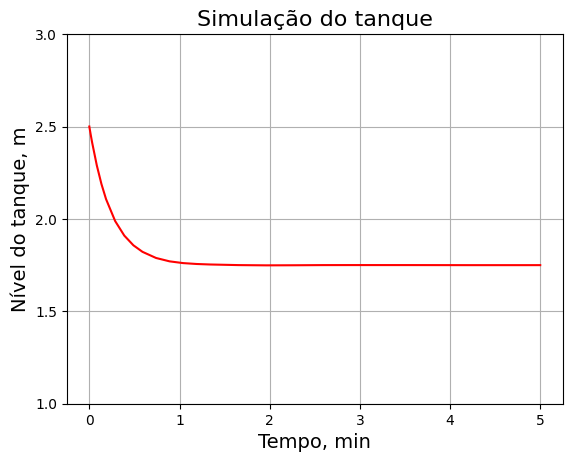

In [11]:
# Gerando o gráfico
plt.plot(t, x, 'r-')
plt.ylabel('Nível do tanque, m', fontsize=14)
plt.xlabel('Tempo, min', fontsize=14)
plt.yticks(np.arange(1.0, 3.5, 0.5))
plt.title('Simulação do tanque', fontsize=16)
plt.grid()
plt.show()

---

A principal vantagem da Programação Orientada a Objetos (POO) é a reutilização de código e a extensibilidade. Usando herança, podemos derivar uma nova classe a partir da classe ReatorCSTR para lidar com um reator mais complexo, por exemplo, um Reator CSTR com reação química. Assim, reaproveitamos grande parte da lógica e adicionamos apenas o comportamento específico da nova aplicação.

# Reator CSTR com Reação Química
Aqui vamos adicionar uma reação de ordem zero ou primeira ordem no reator, que afeta a variação do nível no tanque.

In [12]:
class ReatorCSTRComReacao(TanqueNivel):
    def __init__(self, A=1.0, Rv=0.25, k=0.1, ordem_reacao=1):
        """
        Inicializa o reator com parâmetros adicionais para reação química.

        Args:
            A: Área da seção transversal.
            Rv: Resistência hidráulica.
            k: Constante de reação.
            ordem_reacao: Ordem da reação (0 para zero ordem, 1 para primeira ordem).
        """
        super().__init__(A, Rv)  # Chama o construtor da classe base
        self.k = k  # Constante de reação
        self.ordem_reacao = ordem_reacao  # Ordem da reação

    def modelo(self, t, x, u):
        """
        Modelo do reator com reação química.

        Args:
            t: Tempo (não utilizado, mas exigido pelo solver).
            x: Lista de variáveis de estado (altura do nível).
            u: Lista de entradas do sistema (vazão de alimentação).

        Returns:
            dxdt: Derivadas das variáveis de estado.
        """
        h = x[0]  # Altura do nível no tanque
        q0 = u[0]  # Vazão de entrada
        q = h / self.Rv  # Vazão de saída

        # Taxa de reação (ordem 0 ou 1)
        if self.ordem_reacao == 0:
            r = self.k  # Reação de ordem zero
        elif self.ordem_reacao == 1:
            r = self.k * h  # Reação de primeira ordem
        else:
            raise ValueError("Ordem de reação inválida! Use 0 ou 1.")

        # Equação do modelo considerando a reação
        dhdt = (q0 - q) / self.A - r  # Adiciona o efeito da reação
        return [dhdt]

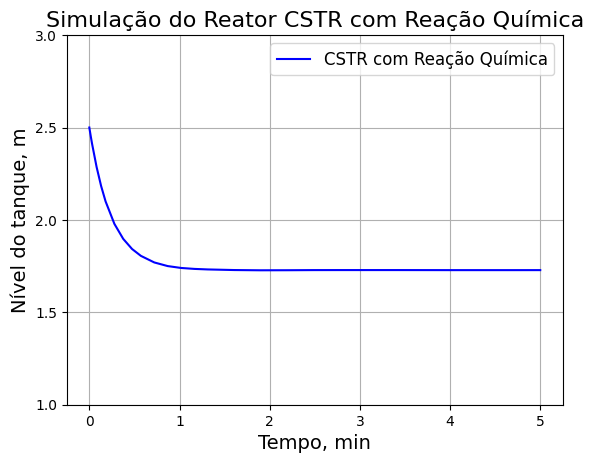

In [13]:
# Configuração do modelo com reação química
q0 = 10.0  # Vazão de alimentação inicial
h0 = 2.5   # Altura inicial do nível no tanque
u0 = [q0 - 3.0]  # Vazão ajustada
x0 = [h0]        # Condição inicial do nível
tspan = [0, 5.0] # Intervalo de tempo de simulação

# Instanciando e simulando o reator com reação química
reator_com_reacao = ReatorCSTRComReacao(k=0.05, ordem_reacao=1)
sol_reacao = reator_com_reacao.simular(x0, u0, tspan)

# Obtendo os resultados
t = sol_reacao.t  # Tempo
x = sol_reacao.y.flatten()  # Nível do tanque

# Gerando o gráfico
plt.plot(t, x, 'b-', label='CSTR com Reação Química')
plt.ylabel('Nível do tanque, m', fontsize=14)
plt.xlabel('Tempo, min', fontsize=14)
plt.yticks(np.arange(1.0, 3.5, 0.5))
plt.title('Simulação do Reator CSTR com Reação Química', fontsize=16)
plt.grid()
plt.legend(fontsize=12)
plt.show()

# Como a Herança Ajudou

1. Reaproveitamento de Código:
* Não precisamos reescrever os métodos de inicialização e simulação.
* Apenas sobrescrevemos o método modelo para incluir a reação química.

2.  Extensibilidade:
* Podemos adicionar diferentes tipos de reações (ordem zero, primeira, segunda, etc.) sem alterar o código original.
* Outros parâmetros, como a constante de reação k e a ordem da reação, foram incorporados sem impacto no restante do programa.

3. Modularidade:
* As simulações de sistemas diferentes (`TanqueNivel` e `ReatorCSTRComReacao`) coexistem sem conflito.
* Isso facilita a comparação de resultados ou a implementação de reatores ainda mais complexos.

---
# Possíveis Extensões

* Controle de Processo:
Adicionar métodos para simular controle de vazão (malha fechada).
* Simulação Multicomponente:
Estender o modelo para lidar com misturas de fluidos com diferentes propriedades.
* Integração com Sensores Virtuais:
Modelar medições simuladas para testes de sistemas de controle avançado.


Essa abordagem destaca como o uso de herança e outros conceitos de POO, como sobrescrita de métodos, pode economizar tempo, manter a organização e facilitar a implementação de novas funcionalidades.